In [1]:
# Imports
# standard imports
import numpy as np
import pandas as pd
# train, test, split
from sklearn.model_selection import train_test_split
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# .py files
import models_adriana
# notebook formatting
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('combined_data_ready.csv')
df.head()

,repo,language,original,clean,stemmed,lemmatized
0,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
1,angular/angular.js,JavaScript,AngularJS [![CircleCI](https://circleci.com/gh...,angularjs circlecihttpscirclecicomghangularang...,angularj circlecihttpscirclecicomghangularangu...,angularjs circlecihttpscirclecicomghangularang...
2,trekhleb/javascript-algorithms,JavaScript,# Algorithms and Data Structures\n\n> 🇺🇦 UKRA...,algorithms data structures ukraine attackedhtt...,algorithm data structur ukrain attackedhttpswa...,algorithms data structure ukraine attackedhttp...
3,jquery/jquery,JavaScript,[jQuery](https://jquery.com/) — New Wave \n===...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,jqueryhttpsjquerycom new wave gitterhttpsbadge...
4,TheOdinProject/javascript-exercises,JavaScript,# Exercises\n\nThese exercises are intended ...,exercises exercises intended complement conten...,exercis exercis intend complement content odin...,exercise exercise intend complement content od...


In [3]:
# summarize data/ inital glace at data
print('_'*50)
print(f'Shape: \n{df.shape}')
print('_'*50)
print(f'Stats: \n{df.describe().T}')
print('_'*50)
print('Info: ')
print(df.info())
print('_'*50)
print(f'Data Types: \n{df.dtypes}')
print('_'*50)
print(f'Null Values: \n{df.isnull().sum()}')
print('_'*50)
print(f'NA Values: \n{df.isna().sum()}')
print('_'*50)
print(f'Unique Value Count: \n{df.nunique()}')
print('_'*50)
print(f'Columns: \n{df.columns}')
print('_'*50)
print(f'Column Value Counts: \n{df.columns.value_counts(dropna=False)}')
print('_'*50)

__________________________________________________
Shape: 
(119, 6)
__________________________________________________
Stats: 
           count unique                                                top  \
repo         119    109                scutan90/DeepLearning-500-questions   
language     119      4                                         JavaScript   
original     119    109  \n# 京东售卖链接：https://item.jd.com/12785031.html\n...   
clean        119    109  httpsitemjdcom12785031html 100 500ai 141347cnn...   
stemmed      119    109  httpsitemjdcom12785031html 100 500ai 141347cnn...   
lemmatized   119    109  httpsitemjdcom12785031html 100 500ai 141347cnn...   

           freq  
repo          2  
language     30  
original      2  
clean         2  
stemmed       2  
lemmatized    2  
__________________________________________________
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
# decision tree on original readme content
val_accuracy, test_accuracy = models_adriana.decision_tree_model(df, 'original')
# create metric table
metric_df = models_adriana.create_models_df('original', 'Decision Tree', val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.8333333333333334
Test Accuracy: 0.75


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.75


In [9]:
# decision tree on cleaned readme content
val_accuracy, test_accuracy = models_adriana.decision_tree_model(df, 'clean')
# add to table
metric_df = models_adriana.add_to_models_df('Decision Tree', 'clean', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.5833333333333334
Test Accuracy: 0.5416666666666666


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667


In [10]:
# decision tree on stemmed readme content
val_accuracy, test_accuracy = models_adriana.decision_tree_model(df, 'stemmed')
# add to table
metric_df = models_adriana.add_to_models_df('Decision Tree', 'stemmed', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.7083333333333334
Test Accuracy: 0.5833333333333334


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333


In [11]:
# decision tree on lemmatized readme content
val_accuracy, test_accuracy = models_adriana.decision_tree_model(df, 'lemmatized')
# add to table
metric_df = models_adriana.add_to_models_df('Decision Tree', 'lemmatized', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.75
Test Accuracy: 0.5833333333333334


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333


In [12]:
# random forest on original readme content
val_accuracy, test_accuracy = models_adriana.random_forest_model(df, 'original')
# add to metric table
metric_df = models_adriana.add_to_models_df('Random Forest', 'original', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.6666666666666666
Test Accuracy: 0.625


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000


In [13]:
# random forest on cleaned readme content
val_accuracy, test_accuracy = models_adriana.random_forest_model(df, 'clean')
# add to metric table
metric_df = models_adriana.add_to_models_df('Random Forest', 'clean', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.75
Test Accuracy: 0.7083333333333334


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333


In [14]:
# random forest on stemmed readme content
val_accuracy, test_accuracy = models_adriana.random_forest_model(df, 'stemmed')
# add to table
metric_df = models_adriana.add_to_models_df('Random Forest', 'stemmed', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.7083333333333334
Test Accuracy: 0.5416666666666666


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667


In [15]:
# random forest on lemmatized readme content
val_accuracy, test_accuracy = models_adriana.random_forest_model(df, 'lemmatized')
# add to table
metric_df = models_adriana.add_to_models_df('Random Forest', 'lemmatized', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.6666666666666666
Test Accuracy: 0.5416666666666666


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667


In [16]:
# knn on original readme content
val_accuracy, test_accuracy = models_adriana.knn_model(df, 'original')
# add to table
metric_df = models_adriana.add_to_models_df('KNN', 'original', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.4166666666666667
Test Accuracy: 0.5


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000


In [17]:
# knn on clean readme content
val_accuracy, test_accuracy = models_adriana.knn_model(df, 'clean')
# add to table
metric_df = models_adriana.add_to_models_df('KNN', 'clean', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.5833333333333334
Test Accuracy: 0.4583333333333333


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


In [18]:
# knn on stemmed readme content
val_accuracy, test_accuracy = models_adriana.knn_model(df, 'stemmed')
# add to table
metric_df = models_adriana.add_to_models_df('KNN', 'stemmed', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.4583333333333333
Test Accuracy: 0.4166666666666667


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


In [19]:
# knn on lemmatized readme content
val_accuracy, test_accuracy = models_adriana.knn_model(df, 'lemmatized')
# add to table
metric_df = models_adriana.add_to_models_df('KNN', 'lemmatized', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.4583333333333333
Test Accuracy: 0.375


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


In [20]:
# logistic regression on original readme content
val_accuracy, test_accuracy = models_adriana.log_reg_model(df, 'original')
# add to table
metric_df = models_adriana.add_to_models_df('logistic regression', 'original', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.625
Test Accuracy: 0.7083333333333334


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


In [21]:
# logistic regression on clean readme content
val_accuracy, test_accuracy = models_adriana.log_reg_model(df, 'clean')
# add to table
metric_df = models_adriana.add_to_models_df('logistic regression', 'clean', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.5833333333333334
Test Accuracy: 0.625


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


In [22]:
# logistic regression on stemmed readme content
val_accuracy, test_accuracy = models_adriana.log_reg_model(df, 'stemmed')
# add to table
metric_df = models_adriana.add_to_models_df('logistic regression', 'stemmed', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.5833333333333334
Test Accuracy: 0.5833333333333334


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


In [23]:
# logistic regression on lemmatized readme content
val_accuracy, test_accuracy = models_adriana.log_reg_model(df, 'lemmatized')
# add to table
metric_df = models_adriana.add_to_models_df('logistic regression', 'lemmatized', metric_df, val_accuracy, test_accuracy)
metric_df

Validation Accuracy: 0.5833333333333334
Test Accuracy: 0.625


,Readme,Model,validate_accuracy,test_accuracy
0,original,Decision Tree,0.833333,0.750000
1,clean,Decision Tree,0.583333,0.541667
2,stemmed,Decision Tree,0.708333,0.583333
3,lemmatized,Decision Tree,0.750000,0.583333
4,original,Random Forest,0.666667,0.625000
5,clean,Random Forest,0.750000,0.708333
6,stemmed,Random Forest,0.708333,0.541667
7,lemmatized,Random Forest,0.666667,0.541667
8,original,KNN,0.416667,0.500000
9,clean,KNN,0.583333,0.458333


__Decision Tree__
    
    Validate most accurate: original readme, 83.3% accuracy
    Test least accurate: original readme, 75.0% accuracy
    
    Validate least accurate: clean readme, 58.3% accuracy
    Test least accurate: clean readme, 54.2% accuracy
    
    In a decision tree model the cleaned readmes were the least accurate, and the original readmes were the most accurate by more than 15%.
---------------------------------------------------------------------        
__Random Forest__
    
    Validate most accurate: clean readme, 75% accuracy
    Test least accurate: clean readme, 70.8% accuracy
    
    Validate least accurate: tie betwenn clean and lemmatized readme, 66.7% accuracy
    Test least accurate: tie between stemmed and lemmatized readme, 54.2% accuracy
    
---------------------------------------------------------------------         
__KNN__
    
    Validate most accurate: clean readme, 58.3% accuracy
    Test least accurate: original readme, 50.0% accuracy
    
    Validate least accurate: original readme, 41.7% accuracy
    Test least accurate: lemmatized readme, 37.5% accuracy
--------------------------------------------------------------------- 

__Logistic Regression__
    
    Validate most accurate: original readme, 62.5% accuracy
    Test least accurate: original readme, 70.8% accuracy
    
    Validate least accurate: three way tie between clean, stemmed, and lemmatized readme, 58.3% accuracy
    Test least accurate: stemmed readme, 58.3% accuracy

In [99]:
dt_results = (metric_df[metric_df['Model'] == 'Decision Tree'])
rf_results = (metric_df[metric_df['Model'] == 'Random Forest'])
knn_results = (metric_df[metric_df['Model'] == 'KNN'])
lr_results = (metric_df[metric_df['Model'] == 'logistic regression'])

original_results = (metric_df[metric_df['Readme'] == 'original'])
clean_results = (metric_df[metric_df['Readme'] == 'clean'])
stemmed_results = (metric_df[metric_df['Readme'] == 'stemmed'])
lemmatized_results = (metric_df[metric_df['Readme'] == 'lemmatized'])

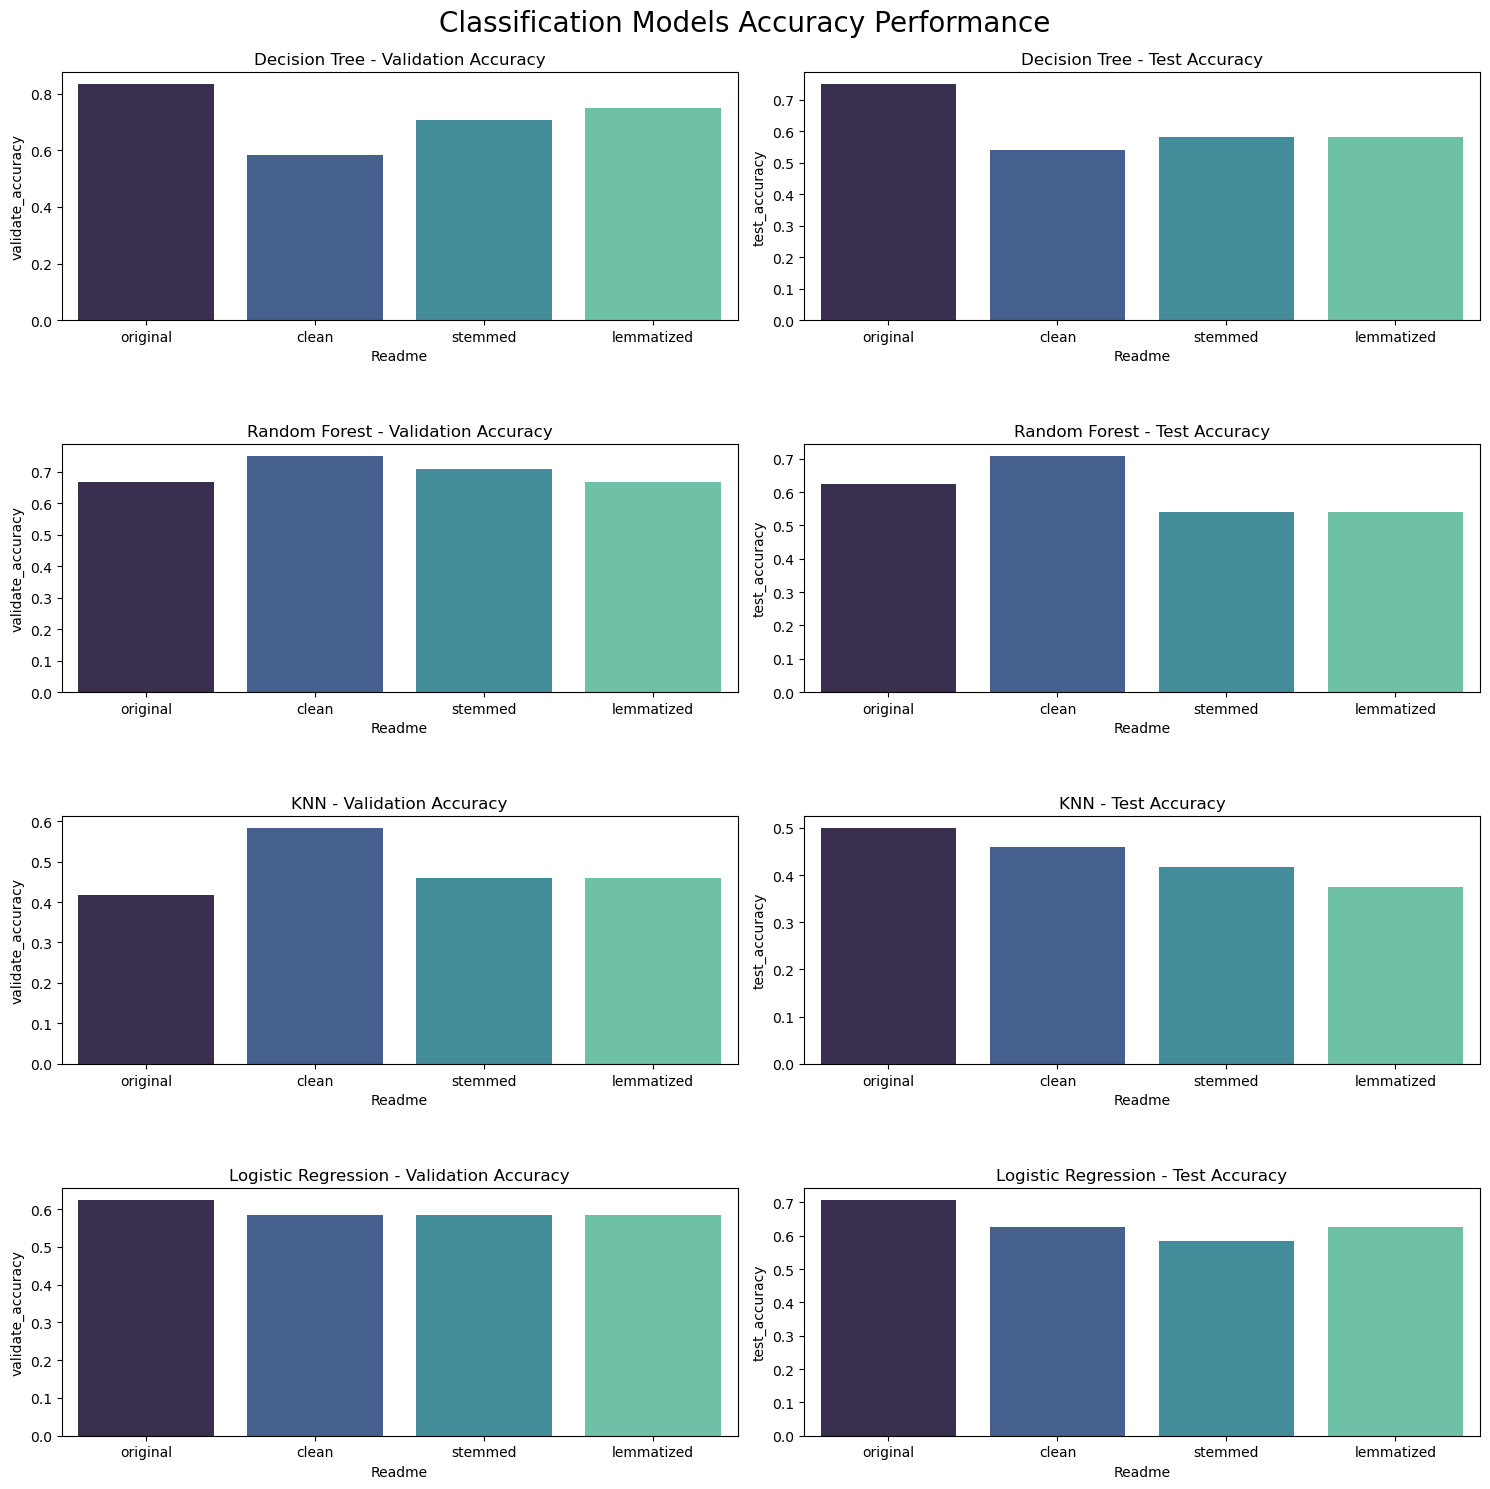

In [88]:
plt.figure(figsize=(15, 15))

# Decision Tree Results
plt.subplot(421)
sns.barplot(data=dt_results, x="Readme", y="validate_accuracy", palette="mako")
plt.title("Decision Tree - Validation Accuracy")

plt.subplot(422)
sns.barplot(data=dt_results, x="Readme", y="test_accuracy", palette="mako")
plt.title("Decision Tree - Test Accuracy")

# Random Forest Results
plt.subplot(423)
sns.barplot(data=rf_results, x="Readme", y="validate_accuracy", palette="mako")
plt.title("Random Forest - Validation Accuracy")

plt.subplot(424)
sns.barplot(data=rf_results, x="Readme", y="test_accuracy", palette="mako")
plt.title("Random Forest - Test Accuracy")

# KNN Results
plt.subplot(425)
sns.barplot(data=knn_results, x="Readme", y="validate_accuracy", palette="mako")
plt.title("KNN - Validation Accuracy")

plt.subplot(426)
sns.barplot(data=knn_results, x="Readme", y="test_accuracy", palette="mako")
plt.title("KNN - Test Accuracy")

# Logistic Regression Results
plt.subplot(427)
sns.barplot(data=lr_results, x="Readme", y="validate_accuracy", palette="mako")
plt.title("Logistic Regression - Validation Accuracy")

plt.subplot(428)
sns.barplot(data=lr_results, x="Readme", y="test_accuracy", palette="mako")
plt.title("Logistic Regression - Test Accuracy")

# Set titles for specific subplots
plt.suptitle("Classification Models Accuracy Performance", fontsize=20, y=0.99)

# Adjust spacing and share x-axis
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
# Show the figure
plt.show()


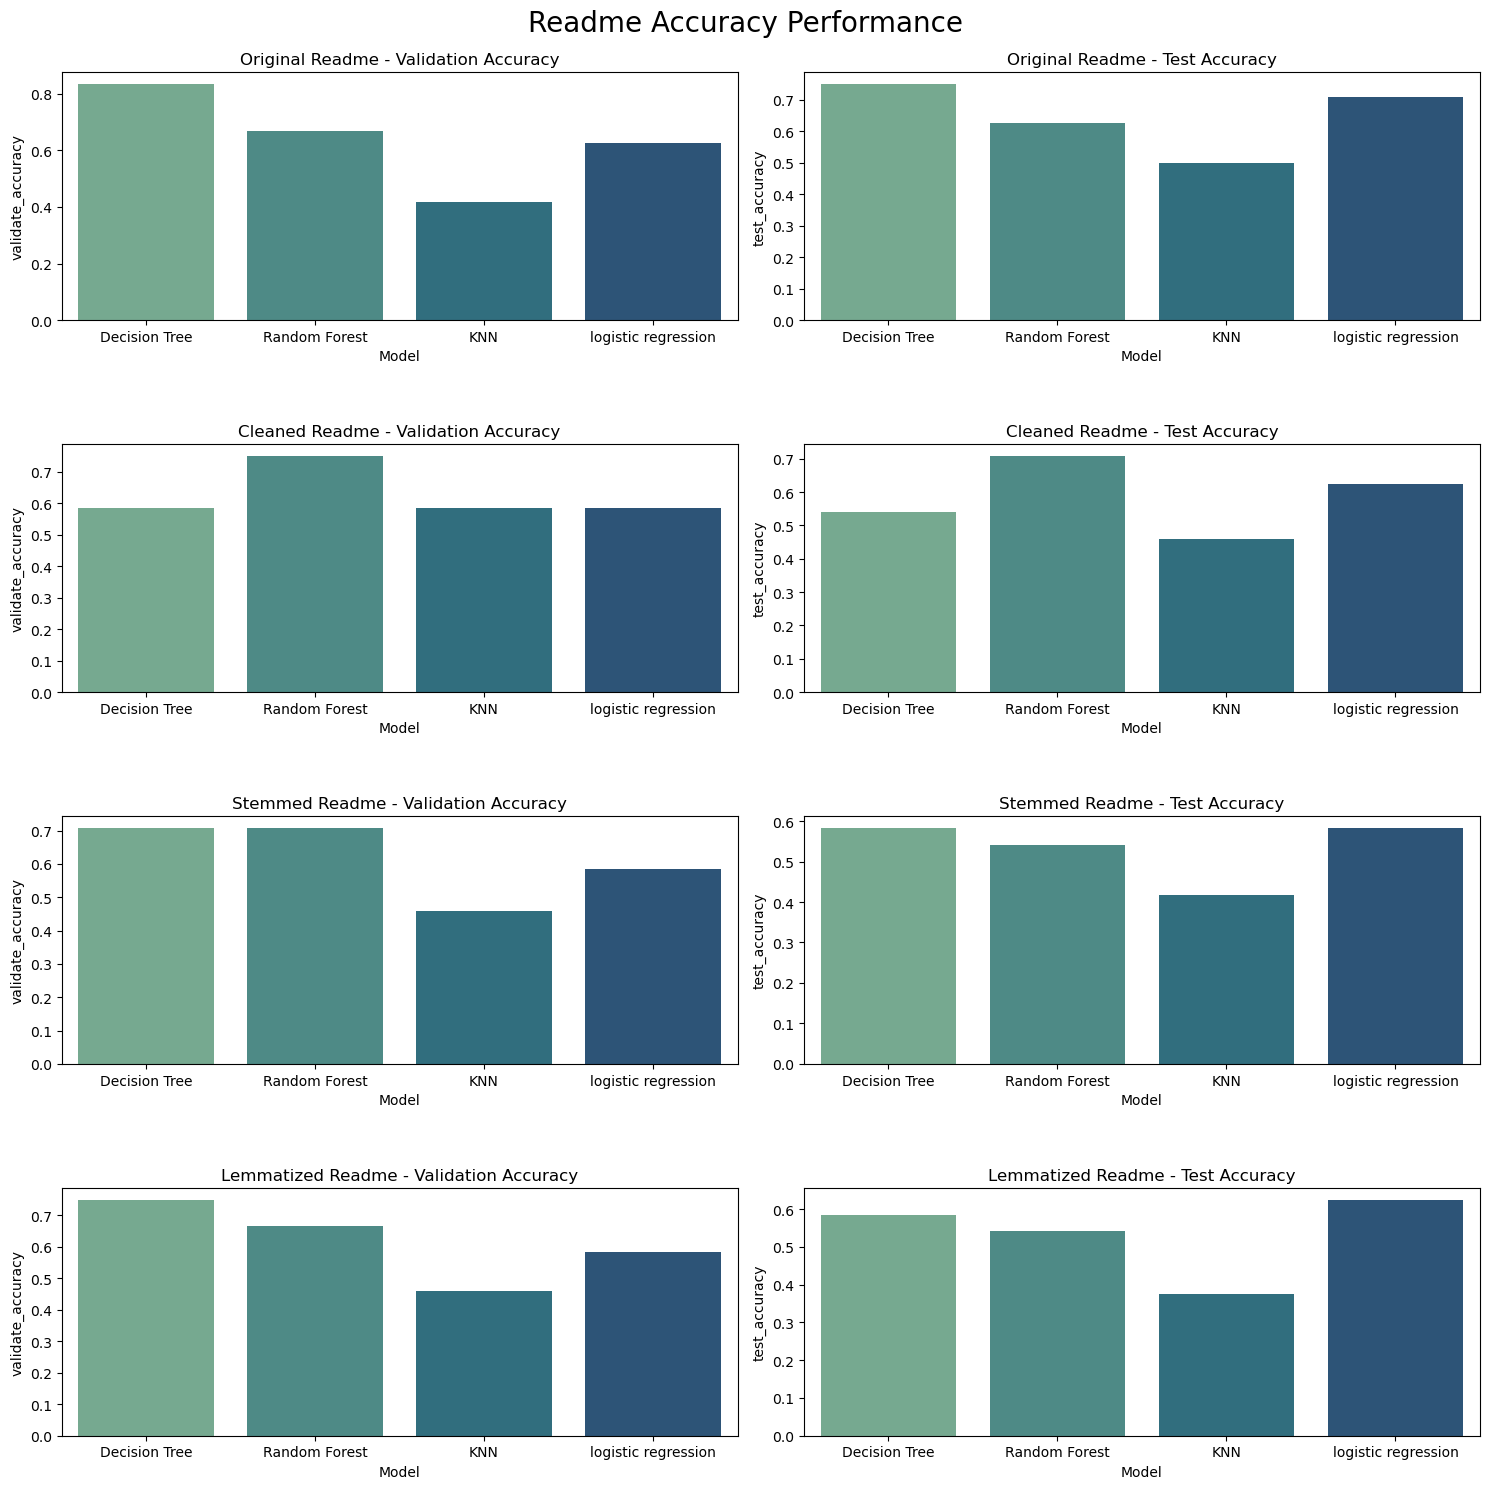

In [101]:
plt.figure(figsize=(15, 15))

# Original Readme Results
plt.subplot(421)
sns.barplot(data=original_results, x="Model", y="validate_accuracy", palette="crest")
plt.title("Original Readme - Validation Accuracy")

plt.subplot(422)
sns.barplot(data=original_results, x="Model", y="test_accuracy", palette="crest")
plt.title("Original Readme - Test Accuracy")

# Cleaned Readme Results
plt.subplot(423)
sns.barplot(data=clean_results, x="Model", y="validate_accuracy", palette="crest")
plt.title("Cleaned Readme - Validation Accuracy")

plt.subplot(424)
sns.barplot(data=clean_results, x="Model", y="test_accuracy", palette="crest")
plt.title("Cleaned Readme - Test Accuracy")

# Stemmed Readme Results
plt.subplot(425)
sns.barplot(data=stemmed_results, x="Model", y="validate_accuracy", palette="crest")
plt.title("Stemmed Readme - Validation Accuracy")

plt.subplot(426)
sns.barplot(data=stemmed_results, x="Model", y="test_accuracy", palette="crest")
plt.title("Stemmed Readme - Test Accuracy")

# lemmatized Readme Results
plt.subplot(427)
sns.barplot(data=lemmatized_results, x="Model", y="validate_accuracy", palette="crest")
plt.title("Lemmatized Readme - Validation Accuracy")

plt.subplot(428)
sns.barplot(data=lemmatized_results, x="Model", y="test_accuracy", palette="crest")
plt.title("Lemmatized Readme - Test Accuracy")

# Set titles for specific subplots
plt.suptitle("Readme Accuracy Performance", fontsize=20, y=0.99)

# Adjust spacing and share x-axis
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
# Show the figure
plt.show()
